# TP 2 : Préparation de données et classification

alexandre.bruckert@univ-nantes.fr


Ce TP est une adaptation du notebook de [Manav Sehgal](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions).

Dans ce TP, nous allons apprendre à préparer des données pour un problème de machine learning, à choisir et entrainer un modèle de classification, à l'appliquer, et à évaluer les résultats.


Nous allons pour cela utiliser les données du [challenge Kaggle Titanic](https://www.kaggle.com/competitions/titanic/), que nous avons évoqué en cours. Le fichier de données se trouve ici : https://uncloud.univ-nantes.fr/index.php/s/kiWKB4eD4GgHjyf. Téléchargez le fichier, et mettez-le dans le même dossier que ce notebook.

In [2]:
# Analyse et manipulation des données
import pandas as pd
import numpy as np
import random as rnd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modèles de Machine Learning et évaluation
import sklearn

## Acquisition des données

Les données sont stockées dans un fichier .csv, c'est à dire un fichier de texte où chaque ligne correspond à un échantillon, et les caractéristiques sont séparées par des virgules.


Pour manipuler les données, nous allons utiliser la librairie [Pandas](https://pandas.pydata.org/docs/index.html). Cette librairie permet la création de structures appelées **dataframes**, particulièrement adaptées à la manipulation de données pour des applications de machine learning ou de statistiques.

In [4]:
# On utiliser la fonction read_csv pour transférer les données du fichier .csv à un dataframe Pandas
titanic_data = pd.read_csv('./titanic_data.csv')

Voici comment un dataframe Pandas se compose :

In [7]:
# On utilise la méthode .head() sur un dataframe pour afficher les 5 premières lignes.
# Cela va nous donner une idée de la structure générale du dataframe
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Les données sont donc organisées sous la forme d'un tableau, où chaque colonne correspondant à une caractéristique est nommée.

Pour accéder à une colonne, on utilise la syntaxe ```dataframe['nom_de_la_colonne']```.

In [8]:
titanic_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Nous allons commencer par constituer un ensemble d'entrainement, ainsi qu'un ensemble de test. Le dataset est composé de 891 échantillons. Nous allons en conserver 80% pour l'entrainement, et garder les 20% restants pour l'évaluation.

In [10]:
# On commence par générer un nombre aléatoire entre 0 et 1 pour chaque ligne du dataframe.
# On vient ensuite conserver la ligne dans les données d'entrainement si le nombre est inférieur à 0.8 (i.e. 80% du temps environ), 
# et de test si le nombre est supérieur à 0.8

msk = np.random.rand(len(titanic_data)) < 0.8

train = titanic_data[msk]
test = titanic_data[~msk]

## Analyse et description des données

Pour commencer, nous allons étudier les données à disposition. En particulier, on souhaite faire la distinction entre les variables **catégorielles** et les variables **numériques**.

In [ ]:
# TODO : Créez une liste categorial_list contenant les noms des colonnes correspondant à des variables catégorielles.
# TODO : Créez une liste numerical_list contenant les noms des colonnes correspondant à des variables numériques.
categorical_list = [...]
numerical_list = [...]

La variable *Ticket* est particulière, en cela qu'elle mélange des données alphanumériques et numériques. Il faudra donc probablement traiter cette variable d'une façon particulière.

De plus, la variable *Names* devra également faire preuve d'un traitement particulier, en celà qu'elle peut contenir des chaînes de caractères complexes, avec parenthèses, guillemets, etc.

On veut également détecter les variables contenant  des valeurs nulles ou vides. Pour celà, on va utiliser la méthode ```isna()``` pour détecter les valeurs nulles, puis ```sum()``` pour les compter.

In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            147
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          562
Embarked         2
dtype: int64

On va s'intéresser un petit peu aux variables **numériques**. Pour cela, on va utiliser la méthode ```describe()```. Expliquez pourquoi la valeur de la ligne *count* pour la variable *Age* est inférieure aux autres.

In [13]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   719.000000  719.000000  719.000000  572.000000  719.000000   
mean    439.620306    0.392211    2.314325   29.600227    0.536857   
std     256.488135    0.488583    0.828600   14.306356    1.137346   
min       1.000000    0.000000    1.000000    0.670000    0.000000   
25%     214.000000    0.000000    2.000000   20.000000    0.000000   
50%     441.000000    0.000000    3.000000   28.000000    0.000000   
75%     661.500000    1.000000    3.000000   38.000000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  719.000000  719.000000  
mean     0.374131   32.953250  
std      0.816234   52.328894  
min      0.000000    0.000000  
25%      0.000000    7.925000  
50%      0.000000   14.458300  
75%      0.000000   31.000000  
max      6.000000  512.329200

On va également s'intéresser à la distribution des variables **catégorielles**. On va utiliser la même méthode, mais avec un argument permettant de considérer ce type de variables.

In [14]:
train.describe(include=['O'])

Name   Sex    Ticket        Cabin Embarked
count                       719   719       719          157      717
unique                      719     2       559          125        3
top     Braund, Mr. Owen Harris  male  CA. 2343  C23 C25 C27        S
freq                          1   462         7            4      517

## Hypothèses

En vous basant sur cette analyse préliminaire (très rapide) des données, quelles hypothèses pouvez-vous faire sur l'utilisation probable de vos données ?
(corrélation, complétion, correction, création, classification...)

## Analyse de corrélation

Pour vérifier nos hypothèses, nous allons rapidement regarder les corrélations entre nos caractéristiques en comparant les variables deux à deux, en exprimant les ratios de l'une en fonction de l'autre. Cette approche ne s'applique néanmoins qu'aux variables catégorielles.

Par exemple, on peut faire l'hypothèse que les passagers de première classe ont pu avoir plus facilement accès à des bateaux de sauvetage, et ont donc plus largement survécu.

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.633136
1       2  0.477419
2       3  0.255696

In [ ]:
#TODO : vérifiez vos autres hypothèses concernant les variables catégorielles de la sorte.

## Analyse visuelle

Pour les variables numériques, on peut essayer de visualiser des motifs récurents qui seraient signes de corrélations entre la variable à prédire et une variable numérique.

Pour cela, on va venir afficher l'histogramme d'une variable pour les passagers survivants, et le comparer à l'histogramme d'une variable pour les autres passagers

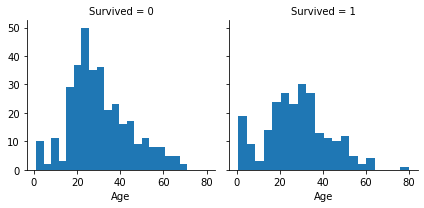

In [17]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [18]:
# TODO : de même, vérifiez vos hypothèses sur les variables numériques en utilisant des histogrammes

On peut également combiner variables ordinales et catégorielles : par exemple, on souhaite observer les relations entre la classe, l'âge du passager, et la survie ou non.

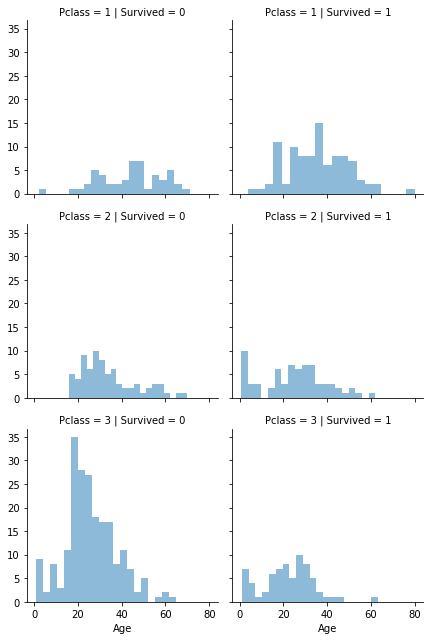

In [22]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

On peut faire de même entre plusieurs variables catégorielles

C:\Users\bruckert-a\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\bruckert-a\anaconda3\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


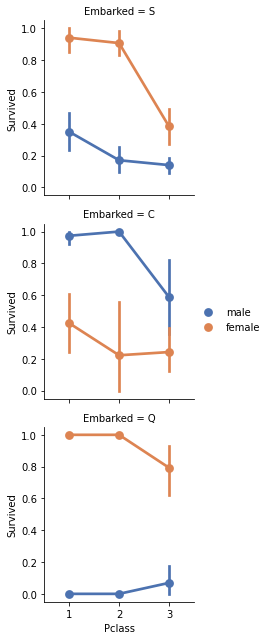

In [24]:
grid = sns.FacetGrid(train, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [25]:
# TODO : vérifiez vos hypothèses

## Préparation des données

### Suppression des caractéristiques inutiles

On peut vouloir corriger les données en supprimant certaines colonnes apportant peu (ou pas) d'information. Pour cela, on va utiliser la méthode ```drop()``` de Pandas.

In [26]:
train = train.drop(['Cabin'], axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
4      0            373450   8.0500        S  
5      0            330877   8.4583        Q

### Créer de nouvelles caractéristiques

On peut également souhaiter créer de nouvelles caractéristiques, en utilisant les données à disposition. Par exemple, on observe dans la caractéristique *Name* certains "titres" devant le nom : Mr., Miss., Dr., etc. On peut faire l'hypothèse que ces titres seront plus intéressants pour déterminer la survie (ou non) du passager que le nom en lui même. Pour cela, on va venir créer une nouvelle colonne, en extrayant le titre grâce à une **expression régulière**.

In [28]:
train['Title'] = train["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title']

0        Mr
1       Mrs
2      Miss
4        Mr
5        Mr
       ... 
883      Mr
884      Mr
885     Mrs
886     Rev
889      Mr
Name: Title, Length: 719, dtype: object

In [ ]:
# TODO : vérifiez l'intérêt de cette nouvelle caractéristique
# TODO : analysez la distribution de cette nouvelle caractéristique dans le jeu de données.

### Convertir une variable catégorielle

Pour utiliser un modèle d'apprentissage, il faut que toutes les variables catégorielles soient converties en variables numériques. Pour cela, on va par exemple assigner un nombre à chaque catégorie de la variable.

In [30]:
# Par exemple, on va commencer par créer une variable pour le genre des passagers
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Compléter une  variable numérique

Comme nous l'avons vu, la variable *Age* contient des valeurs manquantes. Pour remédier à ce problème, une solution est d'ajouter une valeur aléatoire, entre la moyenne et l'écart-type.

In [37]:
# On calcule la moyenne et l'écart-type des âges des passagers
mean_age = train['Age'].mean()
std_age = train['Age'].std()

# On vient générer autant de valeurs aléatoires que de valeurs manquantes
nb_missing_values = train.Age.isnull().sum()

# On vient ensuite trouver les lignes comportant des valeurs manquantes, grâce à la méthode isnull() et la méthode loc()
train.loc[(train.Age.isnull()), "Age"] = np.random.uniform(low=(mean_age - std_age), 
                                                           high=(mean_age + std_age), 
                                                           size=(nb_missing_values,))

# On vérifie bien qu'on n'a plus de valeurs manquantes
print(train.Age.isnull().sum())

0


### Compléter une variable catégorielle

De la même façon, on peut compléter une variable catégorielle qui contiendrait des valeurs manquantes, comme par exemple *Embarked*.

Une façon commune de faire est simplement de remplacer les valeurs manquantes par les valeurs les plus communes. On va pour cela utiliser la méthode ```mode()```.

In [44]:
# On cherche la valeur la plus commune pour la variable "Embarked"
freq_port = train["Embarked"].dropna().mode()[0]
print(freq_port)

# On remplace toutes les valeurs manquantes par cette valeur
train['Embarked'] = train['Embarked'].fillna(freq_port)

# Puis on va assigner à chaque catégorie une valeur numérique
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

S


In [46]:
# TODO : terminer de préparer les données

**Attention : ne pas oublier de préparer le dataset de test de la même façon !**

Il ne reste plus qu'une chose à faire : séparer la variable à prédire (i.e. le label) des autres variables

In [ ]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("Survived", axis=1)
Y_test = test["Survived"]

## Entrainer un modèle de machine learning

Maintenant que nos données sont prêtes, on va pouvoir entraîner un modèle. 

Prenons par exemple un SVC

In [ ]:
# On instancie le modèle 
svc = sklearn.svm.SVC()

On peut ensuite l'entraîner sur nos données d'entrainement

In [ ]:
svc.fit(X_train, Y_train)

In [47]:
# TODO : faire varier les hyperparamètres vu en cours (C, kernel...)

On utilise ensuite le modèle pour prédire les labels sur le jeu de test

In [ ]:
Y_pred = svc.predict(X_test)

On peut ensuite venir comparer les résultats de la prédiction à la vérité terrain

In [ ]:
print(Y_pred)
print(Y_test)

Enfin, on va venir **évaluer** notre modèle. Pour cela, on peut par exemple utiliser la fonction ```accuracy_score``` de scikit-learn

In [ ]:
sklearn.metrics.accuracy_score(Y_pred, Y_test)

**A vous maintenant !**
Reprenez ce notebook, en modifiant le pré-traitement des données, le modèle utilisé, les hyperparamètres, l'évaluation, etc...